In [1]:
##Importing libraries
import pandas as  pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
##Loading the dataset

ds=pd.read_csv(r'../dataset/3D_printer.csv')

In [3]:
##Printing the first five rows
ds.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8.0,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7.0,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1.0,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4.0,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6.0,90,grid,250,80,40,abs,100,92,5,0.7


In [4]:
ds.tail()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
61,0.06,9.0,10,honeycomb,200,75,80,abs,75,200,9,0.9
62,0.04,2.0,80,grid,230,70,40,abs,50,40,12,0.8
63,0.02,4.5,70,honeycomb,240,85,40,abs,75,68,10,0.8
64,0.05,6.0,10,honeycomb,245,75,85,abs,75,205,5,0.5
65,0.15,1.0,50,grid,220,60,120,abs,0,120,16,1.5


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        66 non-null     float64
 1   wall_thickness      66 non-null     float64
 2   infill_density      66 non-null     int64  
 3   infill_pattern      66 non-null     object 
 4   nozzle_temperature  66 non-null     int64  
 5   bed_temperature     66 non-null     int64  
 6   print_speed         66 non-null     int64  
 7   material            66 non-null     object 
 8   fan_speed           66 non-null     int64  
 9   roughness           66 non-null     int64  
 10  tension_strenght    66 non-null     int64  
 11  elongation          66 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 6.3+ KB


In [6]:
##descripive statistics
ds.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.098182,5.583333,54.727273,222.272727,70.378788,64.242424,48.530303,160.545455,19.757576,1.625000
std,0.062608,2.952943,27.545512,15.094110,8.651839,28.598580,35.834328,95.703899,9.202108,0.762498
min,0.020000,1.000000,10.000000,200.000000,60.000000,40.000000,0.000000,21.000000,4.000000,0.400000
25%,0.052500,3.000000,40.000000,210.000000,65.000000,40.000000,25.000000,78.250000,12.000000,1.025000
50%,0.100000,6.000000,50.000000,220.000000,70.000000,60.000000,50.000000,149.500000,18.500000,1.500000
75%,0.150000,8.000000,80.000000,230.000000,75.000000,60.000000,75.000000,220.000000,27.000000,2.175000
max,0.200000,12.000000,100.000000,250.000000,100.000000,120.000000,100.000000,368.000000,38.000000,3.300000


In [7]:
##corr among the data
ds.corr()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
layer_height,1.000000,-0.282933,-0.013763,-0.030562,-0.120838,0.044329,-0.040571,0.773096,0.325276,0.482438
wall_thickness,-0.282933,1.000000,0.025534,-0.130299,0.061974,-0.341273,0.050462,-0.240834,0.336492,0.150234
infill_density,-0.013763,0.025534,1.000000,0.213167,0.119221,-0.048114,0.035763,0.037378,0.278869,0.118003
nozzle_temperature,-0.030562,-0.130299,0.213167,1.000000,0.552889,0.031671,0.580967,0.302494,-0.392501,-0.524996
bed_temperature,-0.120838,0.061974,0.119221,0.552889,1.000000,-0.067218,0.906690,0.106675,-0.247139,-0.310455
print_speed,0.044329,-0.341273,-0.048114,0.031671,-0.067218,1.000000,-0.000353,0.212711,-0.195963,-0.213770
fan_speed,-0.040571,0.050462,0.035763,0.580967,0.906690,-0.000353,1.000000,0.202488,-0.299644,-0.347389
roughness,0.773096,-0.240834,0.037378,0.302494,0.106675,0.212711,0.202488,1.000000,0.038829,0.073683
tension_strenght,0.325276,0.336492,0.278869,-0.392501,-0.247139,-0.195963,-0.299644,0.038829,1.000000,0.834834
elongation,0.482438,0.150234,0.118003,-0.524996,-0.310455,-0.213770,-0.347389,0.073683,0.834834,1.000000


In [8]:
##Finding null values
ds.isnull().any()

layer_height          False
wall_thickness        False
infill_density        False
infill_pattern        False
nozzle_temperature    False
bed_temperature       False
print_speed           False
material              False
fan_speed             False
roughness             False
tension_strenght      False
elongation            False
dtype: bool

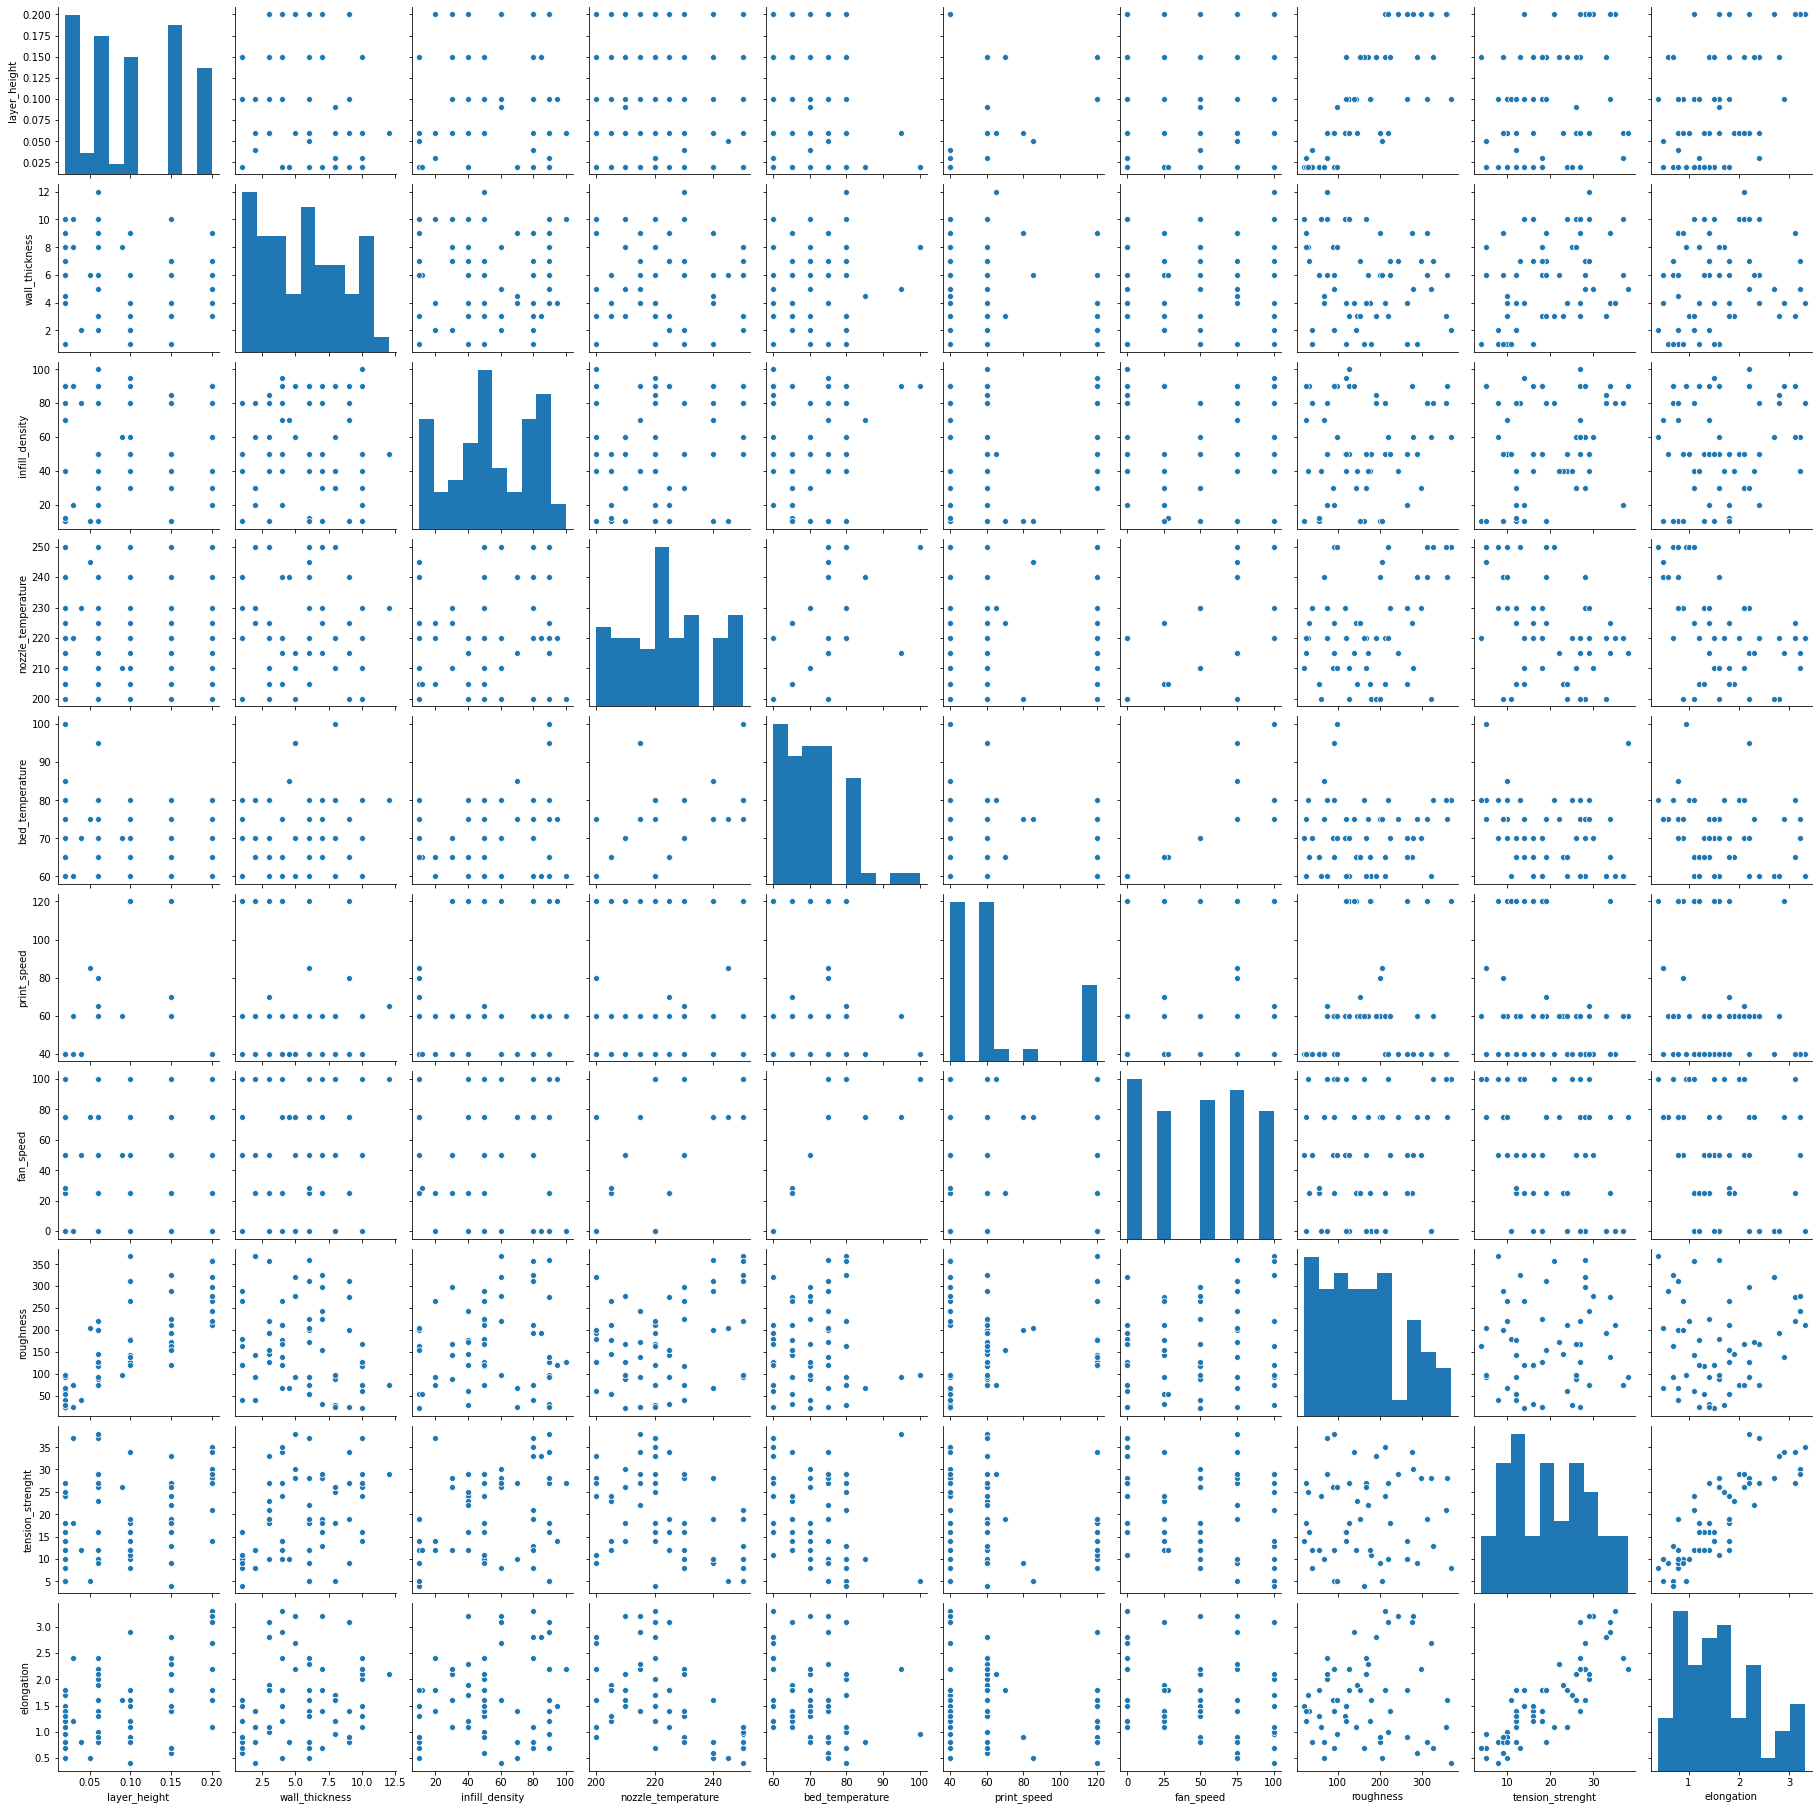

In [9]:
##Seaborn Pairplot
##plots a pairwise relationships in a dataset
sns.pairplot(ds)

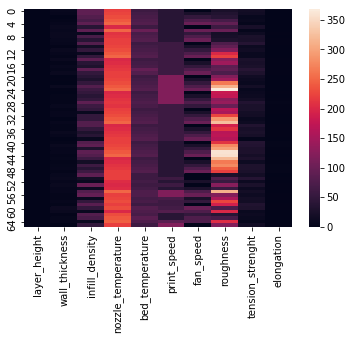

In [10]:
##Seaborn Heatmap
##A way of representing the data in 2-D form
sns.heatmap(ds[['layer_height','wall_thickness','infill_density','nozzle_temperature','bed_temperature','print_speed','fan_speed','roughness','tension_strenght','elongation']])

In [11]:
##Label Emcoding
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

ds=ds.iloc[:,:].values



In [12]:
ds[:,3]=lb.fit_transform(ds[:,3])

ds[:,7]=lb.fit_transform(ds[:,7])

In [13]:
da=pd.DataFrame(ds)

In [14]:
y=ds[:,7]

y=y.astype("int")

In [15]:

da.drop(columns=7,inplace=True)


In [16]:
x=da.iloc[:,:].values

x

array([[0.02, 8.0, 90, 0, 220, 60, 40, 0, 25, 18, 1.2],
       [0.02, 7.0, 90, 1, 225, 65, 40, 25, 32, 16, 1.4],
       [0.02, 1.0, 80, 0, 230, 70, 40, 50, 40, 8, 0.8],
       [0.02, 4.0, 70, 1, 240, 75, 40, 75, 68, 10, 0.5],
       [0.02, 6.0, 90, 0, 250, 80, 40, 100, 92, 5, 0.7],
       [0.02, 10.0, 40, 1, 200, 60, 40, 0, 60, 24, 1.1],
       [0.02, 8.0, 90, 0, 250, 100, 40, 100, 98, 5, 0.95],
       [0.02, 10.0, 10, 1, 210, 70, 40, 50, 21, 14, 1.5],
       [0.02, 9.0, 70, 0, 215, 75, 40, 75, 24, 27, 1.4],
       [0.02, 8.0, 40, 1, 220, 80, 40, 100, 30, 25, 1.7],
       [0.06, 6.0, 80, 0, 220, 60, 60, 0, 75, 37, 2.4],
       [0.06, 2.0, 20, 1, 225, 65, 60, 25, 92, 12, 1.4],
       [0.06, 10.0, 50, 0, 230, 70, 60, 50, 118, 16, 1.3],
       [0.06, 6.0, 10, 1, 240, 75, 60, 75, 200, 9, 0.8],
       [0.06, 3.0, 50, 0, 250, 80, 60, 100, 220, 10, 1.0],
       [0.06, 10.0, 90, 1, 200, 60, 60, 0, 126, 27, 2.2],
       [0.06, 3.0, 40, 0, 205, 65, 60, 25, 145, 23, 1.9],
       [0.06, 8.0, 30, 1

In [17]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [18]:
# FEATURE SCALING

from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()



In [19]:
x_train

array([[0.15, 1.0, 50, 0, 220, 60, 120, 0, 120, 16, 1.5],
       [0.02, 1.0, 80, 0, 230, 70, 40, 50, 40, 8, 0.8],
       [0.06, 2.0, 20, 1, 225, 65, 60, 25, 92, 12, 1.4],
       [0.15, 4.0, 50, 0, 220, 60, 60, 0, 168, 27, 2.4],
       [0.06, 6.0, 80, 0, 220, 60, 60, 0, 75, 37, 2.4],
       [0.1, 1.0, 50, 0, 230, 70, 120, 50, 265, 10, 0.9],
       [0.2, 9.0, 90, 1, 225, 65, 40, 25, 276, 34, 3.1],
       [0.05, 6.0, 10, 1, 245, 75, 85, 75, 205, 5, 0.5],
       [0.15, 6.0, 50, 0, 230, 70, 60, 50, 225, 18, 1.4],
       [0.02, 10.0, 10, 1, 210, 70, 40, 50, 21, 14, 1.5],
       [0.06, 3.0, 50, 0, 250, 80, 60, 100, 220, 10, 1.0],
       [0.1, 4.0, 40, 0, 205, 65, 120, 25, 176, 12, 1.2],
       [0.1, 3.0, 50, 1, 210, 70, 120, 50, 128, 18, 1.8],
       [0.1, 4.0, 95, 0, 220, 75, 120, 100, 121, 14, 1.5],
       [0.2, 7.0, 30, 0, 230, 70, 40, 50, 298, 28, 2.2],
       [0.2, 6.0, 90, 1, 240, 75, 40, 75, 360, 28, 1.6],
       [0.06, 12.0, 50, 1, 230, 80, 65, 100, 74, 29, 2.1],
       [0.06, 5.0, 90

In [20]:
x_train=sc.fit_transform(x_train)



In [21]:
x_train


array([[0.72222222, 0.        , 0.44444444, 0.        , 0.4       ,
        0.        , 1.        , 0.        , 0.28530259, 0.35294118,
        0.39285714],
       [0.        , 0.        , 0.77777778, 0.        , 0.6       ,
        0.25      , 0.        , 0.5       , 0.05475504, 0.11764706,
        0.14285714],
       [0.22222222, 0.09090909, 0.11111111, 1.        , 0.5       ,
        0.125     , 0.25      , 0.25      , 0.20461095, 0.23529412,
        0.35714286],
       [0.72222222, 0.27272727, 0.44444444, 0.        , 0.4       ,
        0.        , 0.25      , 0.        , 0.42363112, 0.67647059,
        0.71428571],
       [0.22222222, 0.45454545, 0.77777778, 0.        , 0.4       ,
        0.        , 0.25      , 0.        , 0.1556196 , 0.97058824,
        0.71428571],
       [0.44444444, 0.        , 0.44444444, 0.        , 0.6       ,
        0.25      , 1.        , 0.5       , 0.70317003, 0.17647059,
        0.17857143],
       [1.        , 0.72727273, 0.88888889, 1.        , 0.

In [22]:

x_test=sc.transform(x_test)

x_test

array([[1.        , 0.36363636, 0.55555556, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.86455331, 0.70588235,
        0.82142857],
       [0.44444444, 0.27272727, 0.88888889, 0.        , 0.3       ,
        0.375     , 1.        , 0.75      , 0.33717579, 0.88235294,
        0.89285714],
       [0.38888889, 0.63636364, 0.55555556, 1.        , 0.2       ,
        0.25      , 0.25      , 0.5       , 0.22190202, 0.64705882,
        0.42857143],
       [0.44444444, 0.45454545, 0.77777778, 1.        , 1.        ,
        0.375     , 1.        , 0.75      , 0.83861671, 0.44117647,
        0.14285714],
       [0.        , 0.31818182, 0.66666667, 1.        , 0.8       ,
        0.625     , 0.        , 0.75      , 0.13544669, 0.17647059,
        0.14285714],
       [0.72222222, 0.54545455, 0.        , 1.        , 0.5       ,
        0.125     , 0.25      , 0.25      , 0.3832853 , 0.44117647,
        0.5       ],
       [0.05555556, 0.81818182, 0.11111111, 1.        , 0.

In [23]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

# decision tree

# training

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt=DecisionTreeClassifier(criterion='entropy')

In [26]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

# predicting

In [27]:
y_pred_dt=dt.predict(x_test)

In [28]:
y_pred_dt

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [29]:
import sklearn.metrics as metrics

In [30]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred_dt)

In [31]:
roc_auc_DT=metrics.auc(fpr,tpr)

In [32]:
roc_auc_DT

0.9375

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred_dt)

0.9285714285714286

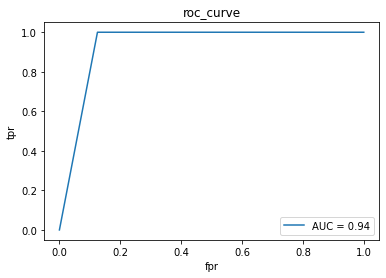

In [35]:
plt.plot(fpr,tpr,label='AUC = %0.2f' % roc_auc_DT)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc_curve")
plt.legend()

In [36]:
#saving our model into a file
import pickle
pickle.dump(dt,open('PRJ.pkl','wb'))

In [37]:
pickle.dump(sc,open('sc.pkl','wb'))
pickle.dump(lb,open('lb.pkl','wb'))